# Modeling

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
hf_df=pd.read_csv('hf_df.csv')
hf_df.drop(columns='Unnamed: 0',inplace=True)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(hf_df.drop(columns='DEATH_EVENT'), 
                                                    hf_df.DEATH_EVENT, test_size=0.3, 
                                                    random_state=10)

In [4]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
286,90.0,1,337,0,38,0,390000.00,0.90,144,0,0
234,70.0,0,232,0,30,0,173000.00,1.20,132,1,0
20,68.0,1,220,0,35,1,289000.00,0.90,140,1,1
38,70.0,0,582,0,20,1,263358.03,1.83,134,1,1
271,60.0,1,257,1,30,0,150000.00,1.00,137,1,1
...,...,...,...,...,...,...,...,...,...,...,...
156,85.0,1,910,0,50,0,235000.00,1.30,134,1,0
123,43.0,1,358,0,50,0,237000.00,1.30,135,0,0
15,87.0,1,149,0,38,0,262000.00,0.90,140,1,0
125,58.0,1,200,1,60,0,300000.00,0.80,137,0,0


Using the features shown above, we will try to predict whether the patient survived from a heart failure or a not. We will also try to determine which feature contributes the most in determining the result.

## 2. Entropy Model: No Max Depth

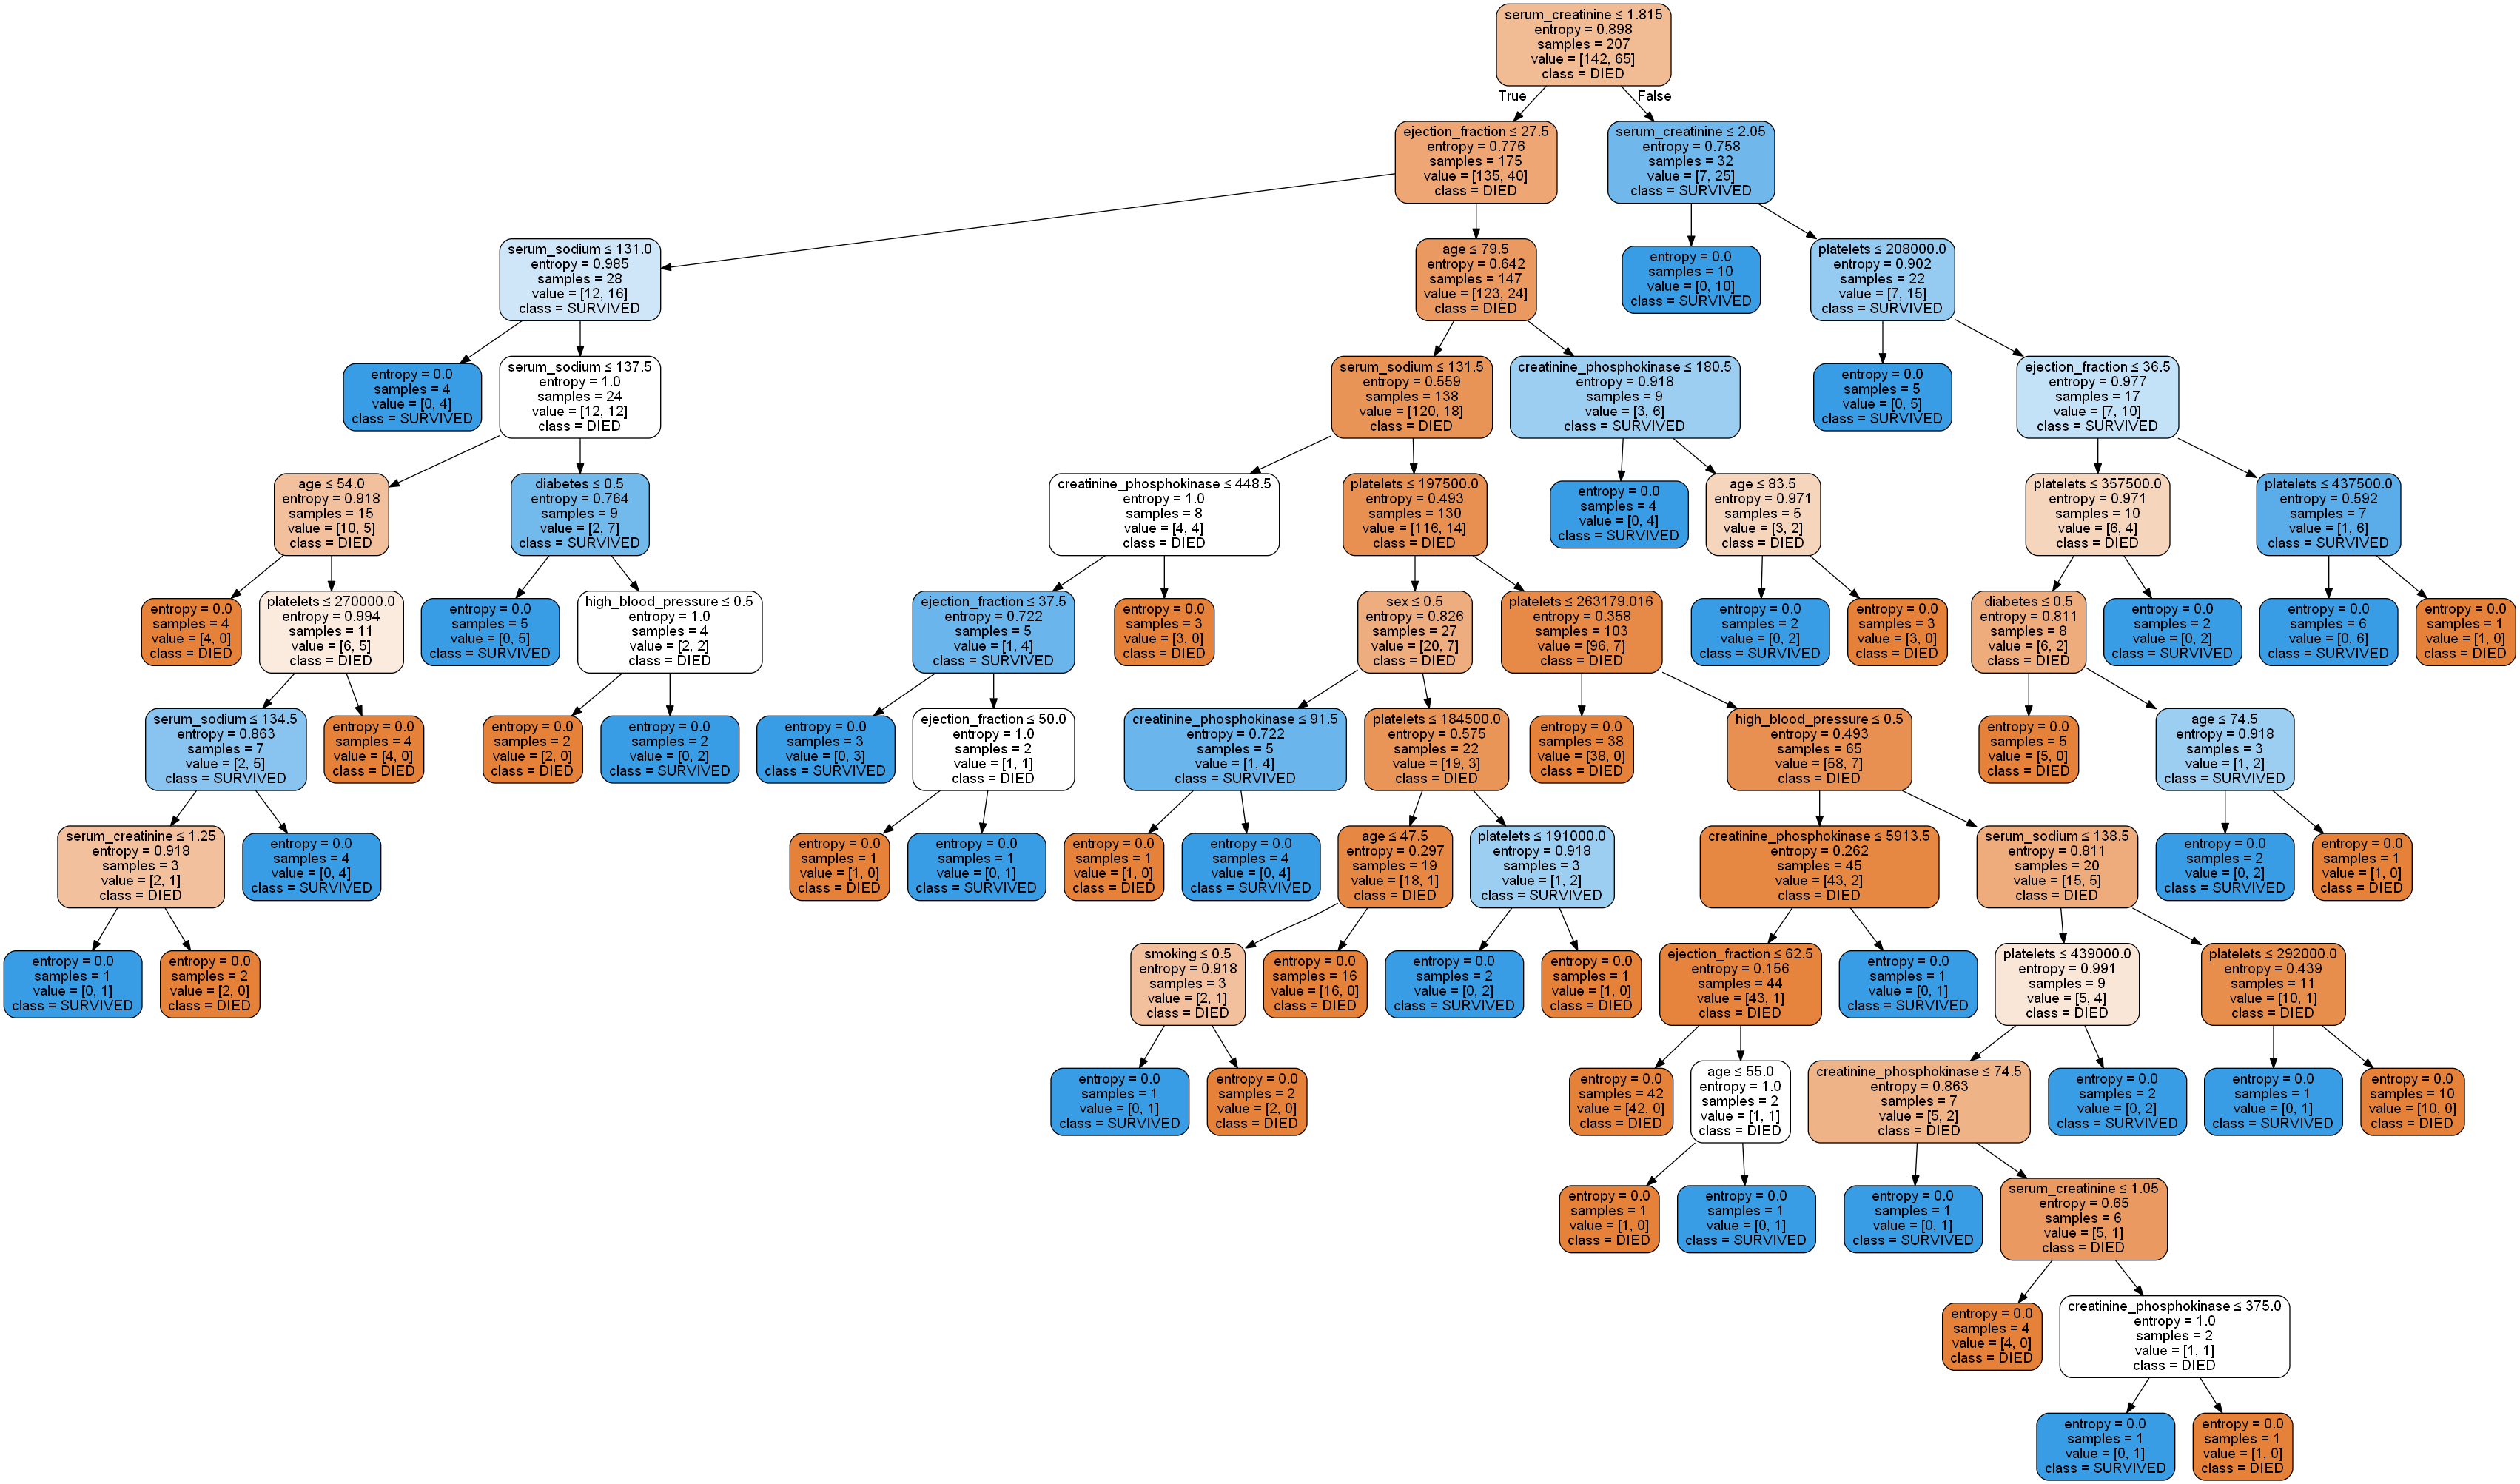

In [5]:
entr_model=tree.DecisionTreeClassifier(criterion='entropy')
entr_model.fit(X_train,y_train)
y_pred=entr_model.predict(X_test)
y_pred=pd.Series(y_pred)
dot_data = StringIO()
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["DIED", "SURVIVED"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [6]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "DIED"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "SURVIVED"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for "DIED"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "SURVIVED"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.6966292134831461
Balanced accuracy: 0.685919540229885
Precision score for "DIED" 0.5277777777777778
Precision score for "SURVIVED" 0.8113207547169812
Recall score for "DIED" 0.6551724137931034
Recall score for "SURVIVED" 0.7166666666666667


In [7]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        60
           1       0.53      0.66      0.58        29

    accuracy                           0.70        89
   macro avg       0.67      0.69      0.67        89
weighted avg       0.72      0.70      0.70        89



Looking at the precision score for 'Yes', The model seems to perform poortly on predicting whether a person survived or not given that they died.

## 2.1 Entropy Model: Max Depth i

In [8]:
for i in range(1,13):
    entr_model2= tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    entr_model2.fit(X_train, y_train)
    y_pred = entr_model2.predict(X_test)
    y_pred = pd.Series(y_pred)
    print("Model: Entropy model max depth",i)
    print("    Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("    Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
    print('    Precision score for "DIED"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
    print('    Recall score for "SURVIVED"' , metrics.recall_score(y_test,y_pred, pos_label = 0))
    print('')

Model: Entropy model max depth 1
    Accuracy: 0.6966292134831461
    Balanced accuracy: 0.5879310344827586
    Precision score for "DIED" 0.5714285714285714
    Recall score for "SURVIVED" 0.9

Model: Entropy model max depth 2
    Accuracy: 0.7415730337078652
    Balanced accuracy: 0.7014367816091953
    Precision score for "DIED" 0.6071428571428571
    Recall score for "SURVIVED" 0.8166666666666667

Model: Entropy model max depth 3
    Accuracy: 0.7303370786516854
    Balanced accuracy: 0.6485632183908046
    Precision score for "DIED" 0.631578947368421
    Recall score for "SURVIVED" 0.8833333333333333

Model: Entropy model max depth 4
    Accuracy: 0.7415730337078652
    Balanced accuracy: 0.6658045977011494
    Precision score for "DIED" 0.65
    Recall score for "SURVIVED" 0.8833333333333333

Model: Entropy model max depth 5
    Accuracy: 0.7303370786516854
    Balanced accuracy: 0.6752873563218391
    Precision score for "DIED" 0.6
    Recall score for "SURVIVED" 0.8333333333333

It seems that setting max_depth equal to 4 gives the best predictions.

In [9]:
entr_model2= tree.DecisionTreeClassifier(criterion="entropy", max_depth = 4)
entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)
y_pred = pd.Series(y_pred)
print("Model: Entropy model max depth",4)
print(classification_report(y_test,y_pred))

Model: Entropy model max depth 4
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        60
           1       0.65      0.45      0.53        29

    accuracy                           0.74        89
   macro avg       0.71      0.67      0.68        89
weighted avg       0.73      0.74      0.73        89



The scores improved in general; but this time it seems that it is doing a poor job in being correct given that it predicted that the patient died.

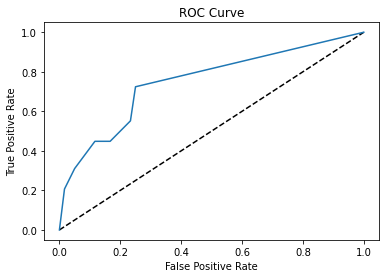

AUC Score: 0.7485632183908046


In [10]:
entr_model_final= tree.DecisionTreeClassifier(criterion="entropy",max_depth=4)
entr_model_final.fit(X_train, y_train)
y_pred = entr_model_final.predict(X_test)
y_pred = pd.Series(y_pred)
# Compute predicted probabilities: y_pred_prob
y_pred_prob = entr_model_final.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('AUC Score:',auc(false_positive_rate, true_positive_rate))

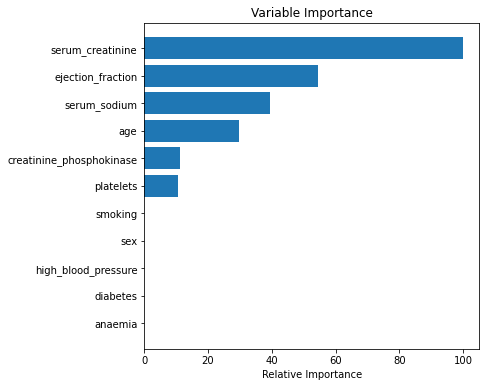

In [11]:
#create a function that shows feature importance
def feat_importance(model):
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
    sorted_idx = np.argsort(feature_importance)[:30]

    pos = np.arange(sorted_idx.shape[0]) + .5
    sorted_idx.size
    plt.figure(figsize=(6,6))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
feat_importance(entr_model_final)

Serum creatinine levels and ejection fraction rate seem to be the biggest determining factor in predicting whether the patient survived or not. Surprisingly, it does not take into account whether the patient smokes, has high blood pressure, or has diabetes. This is in line with the analysis from exploratory data analysis.

## 3. Gini Impurity Model: No Max Depth

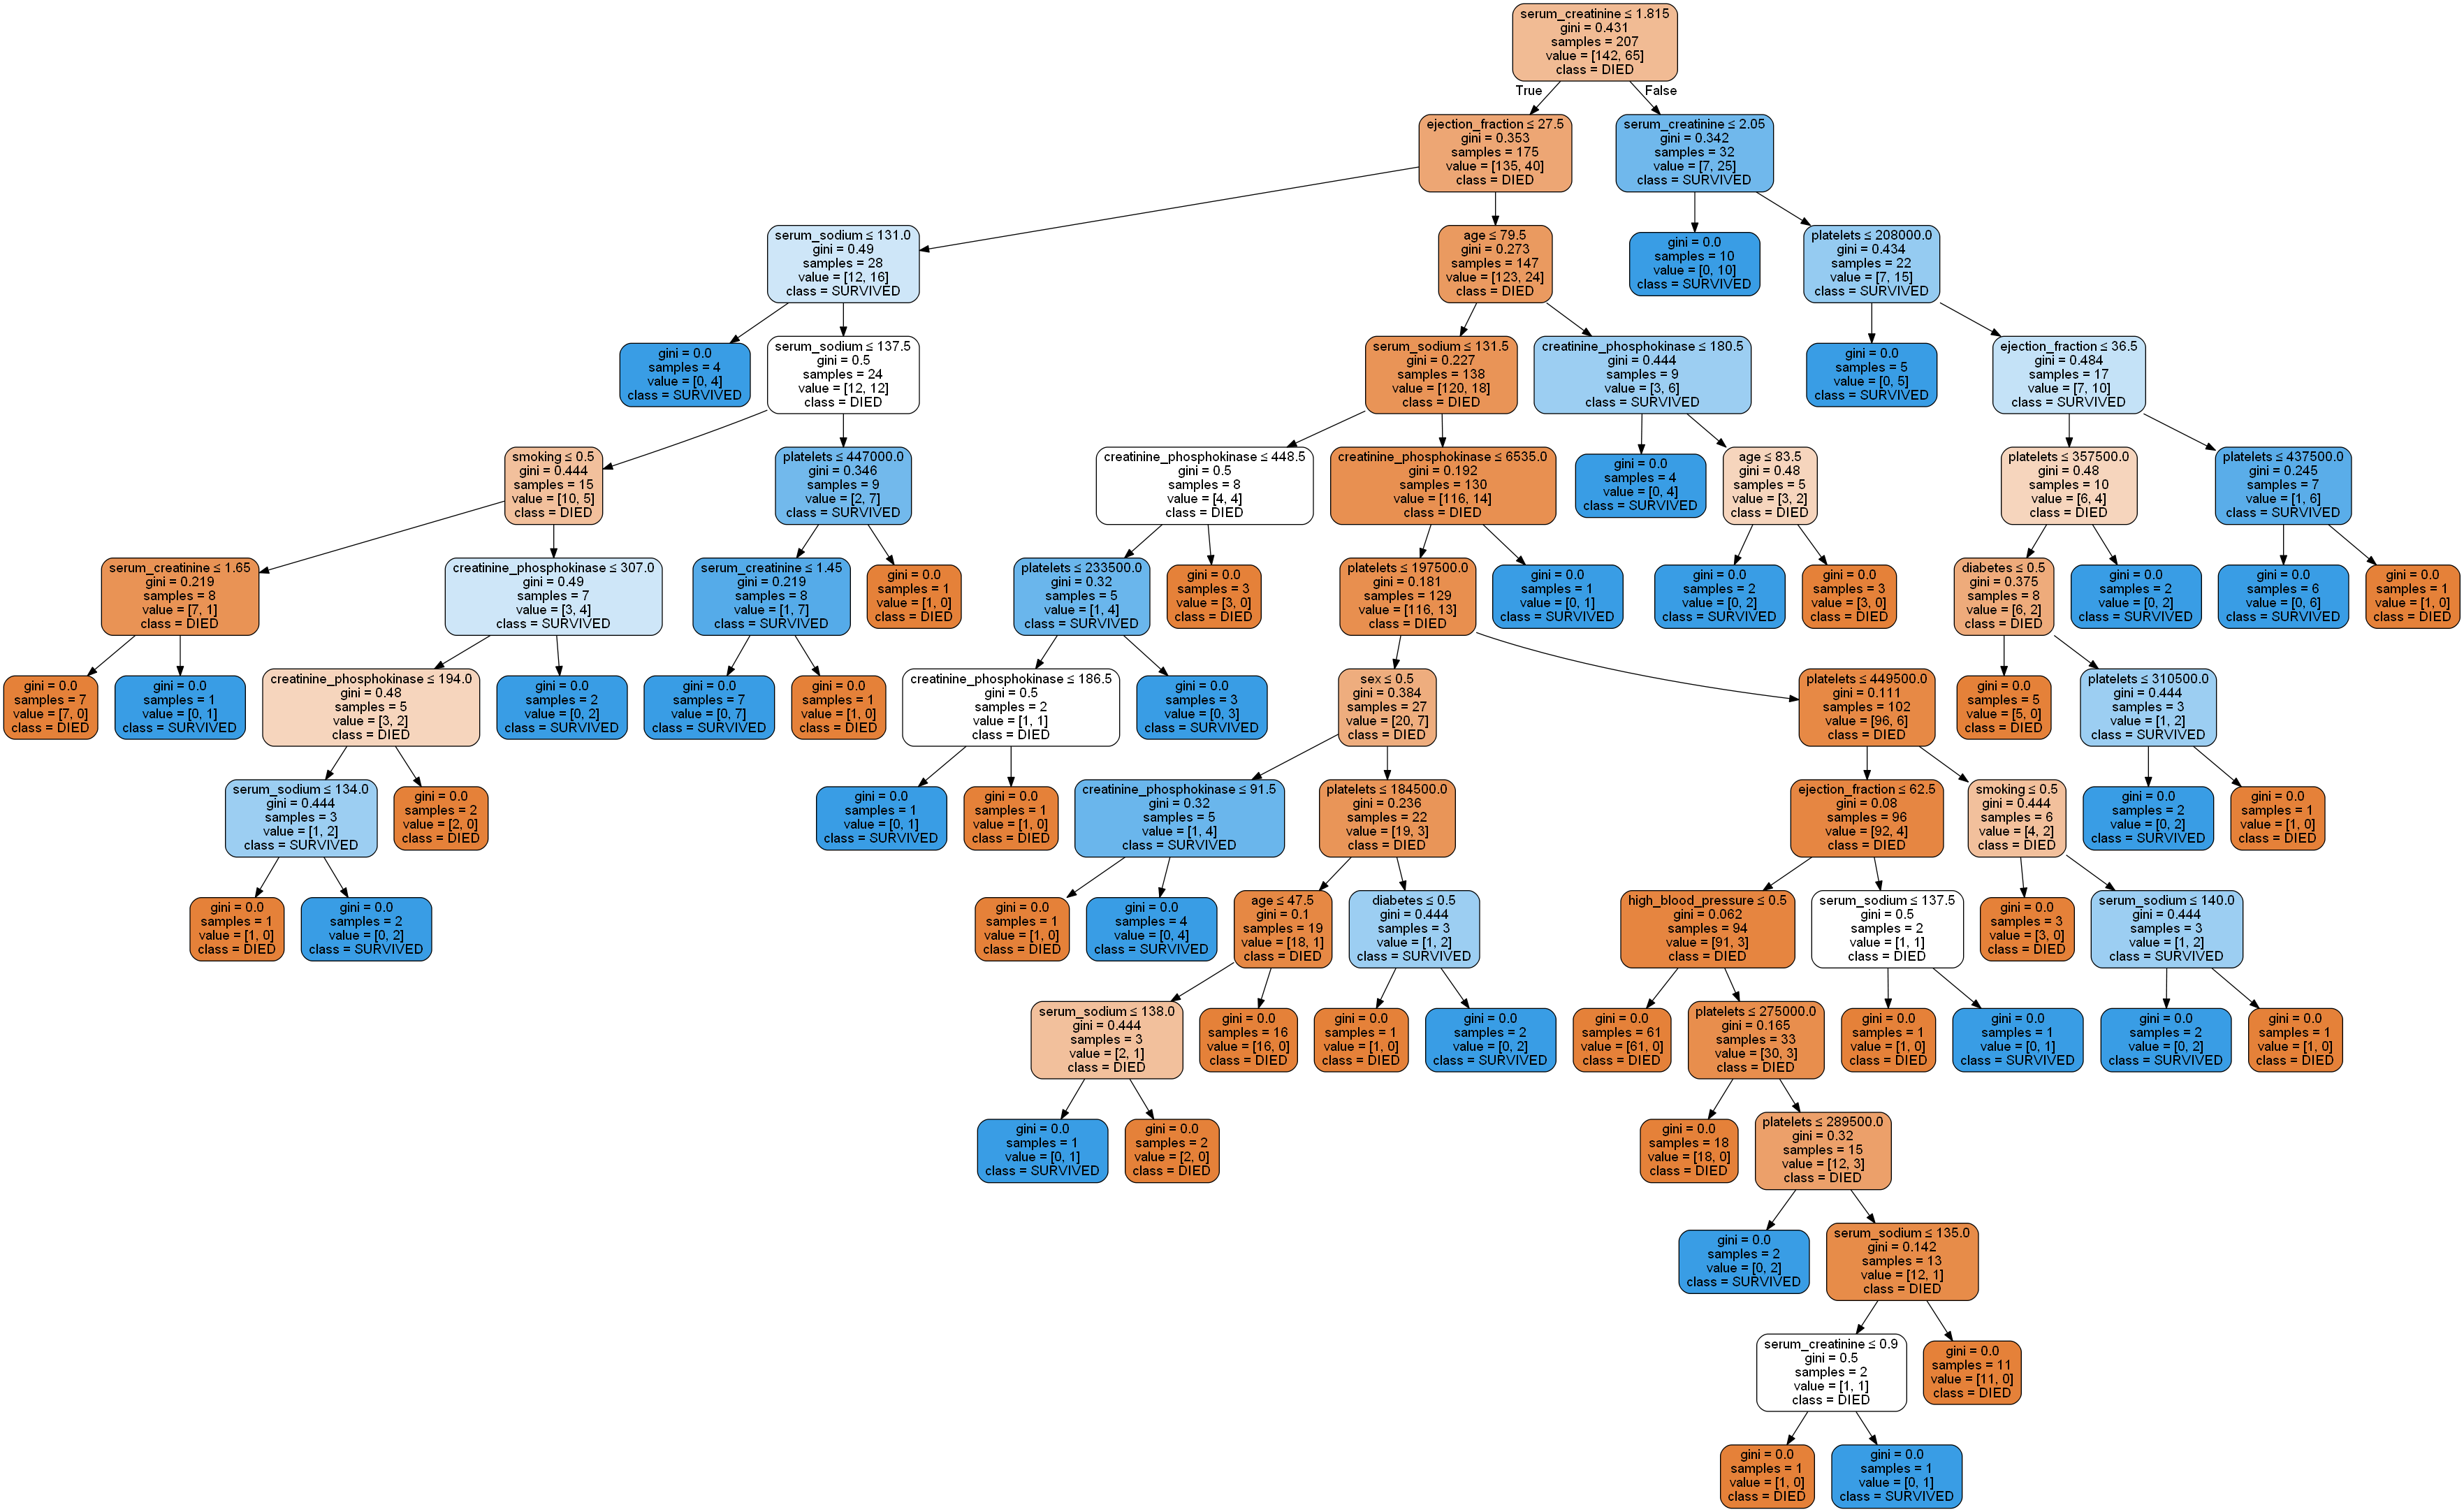

In [12]:
gini_model=tree.DecisionTreeClassifier(criterion='gini')
gini_model.fit(X_train,y_train)
y_pred=gini_model.predict(X_test)
y_pred=pd.Series(y_pred)
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["DIED", "SURVIVED"]) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
print("Model: Gini impurity model")
print("     Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("     Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print("     Precision score for 'DIED'" , metrics.precision_score(y_test,y_pred, pos_label = 1))
print("     Recall score for 'SURVIVED'" , metrics.recall_score(y_test,y_pred, pos_label = 0))


Model: Gini impurity model
     Accuracy: 0.6853932584269663
     Balanced accuracy: 0.6597701149425287
     Precision score for 'DIED' 0.5151515151515151
     Recall score for 'SURVIVED' 0.7333333333333333


## 4.1. Gini Impurity Model: Max Depth i

In [14]:
for i in range(1,16):
    gini_model2= tree.DecisionTreeClassifier(criterion="gini", max_depth = i)
    gini_model2.fit(X_train, y_train)
    y_pred = gini_model2.predict(X_test)
    y_pred = pd.Series(y_pred)
    print("Model: Gini model max depth",i)
    print("    Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("    Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
    print('    Precision score for "DIED"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
    print('    Recall score for "SURVIVED"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model: Gini model max depth 1
    Accuracy: 0.6966292134831461
    Balanced accuracy: 0.5879310344827586
    Precision score for "DIED" 0.5714285714285714
    Recall score for "SURVIVED" 0.9
Model: Gini model max depth 2
    Accuracy: 0.7415730337078652
    Balanced accuracy: 0.7014367816091953
    Precision score for "DIED" 0.6071428571428571
    Recall score for "SURVIVED" 0.8166666666666667
Model: Gini model max depth 3
    Accuracy: 0.7303370786516854
    Balanced accuracy: 0.6485632183908046
    Precision score for "DIED" 0.631578947368421
    Recall score for "SURVIVED" 0.8833333333333333
Model: Gini model max depth 4
    Accuracy: 0.7415730337078652
    Balanced accuracy: 0.6658045977011494
    Precision score for "DIED" 0.65
    Recall score for "SURVIVED" 0.8833333333333333
Model: Gini model max depth 5
    Accuracy: 0.7528089887640449
    Balanced accuracy: 0.7097701149425287
    Precision score for "DIED" 0.6296296296296297
    Recall score for "SURVIVED" 0.8333333333333334


In [15]:
gini_model2= tree.DecisionTreeClassifier(criterion="gini", max_depth = 4)
gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        60
           1       0.65      0.45      0.53        29

    accuracy                           0.74        89
   macro avg       0.71      0.67      0.68        89
weighted avg       0.73      0.74      0.73        89



Gini model also performs best when max_depth is set to 4, but it gives the same result as the entropy model at max_depth=4.

## 5. Random Forest Model Using RandomSearchCV

In [16]:
RFModel=RandomForestClassifier(random_state=10)
param_grid = { 
    'criterion':['gini', 'entropy'],
    'n_estimators': [i for i in range(1,200)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(1,30)],
}
RandomCV_RFModel = RandomizedSearchCV(estimator=RFModel, param_distributions=param_grid, cv= 3,random_state=10) #cv=3 because data size is relatively small
RandomCV_RFModel.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
          

In [17]:
RandomCV_RFModel.best_params_

{'n_estimators': 53,
 'max_features': 'auto',
 'max_depth': 18,
 'criterion': 'gini'}

Train model using the hyperparameters found above:

In [18]:
RFModel=RandomForestClassifier(n_estimators=53,max_features='auto',max_depth=18,criterion='gini',random_state=10)
RFModel.fit(X_train,y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)
print('"Model: Random Forest"')
print("    Accuracy:", accuracy_score(y_test, y_pred))
print('    f1-score=', f1_score(y_test, y_pred, average='weighted'))
print("    Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('    Precision score for "DIED"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('    Recall score for "SURVIVED"' , metrics.recall_score(y_test,y_pred, pos_label = 0))
print('    Confusion Matrix:','\n',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

"Model: Random Forest"
    Accuracy: 0.7191011235955056
    f1-score= 0.7075650573420557
    Balanced accuracy: 0.6491379310344827
    Precision score for "DIED" 0.5909090909090909
    Recall score for "SURVIVED" 0.85
    Confusion Matrix: 
 [[51  9]
 [16 13]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        60
           1       0.59      0.45      0.51        29

    accuracy                           0.72        89
   macro avg       0.68      0.65      0.66        89
weighted avg       0.71      0.72      0.71        89



The classification report looks better in general than the entropy model we had; although it seems to be having bit of a hard time making predictions on patients that died.

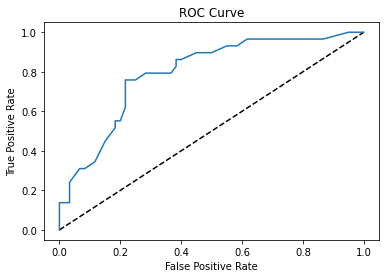

AUC Score: 0.7936781609195404


In [19]:
y_pred_prob = RFModel.predict_proba(X_test)[:,1]

# Plot ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('AUC Score:',auc(false_positive_rate, true_positive_rate))


AUC Score is also better than the one from the entropy model.

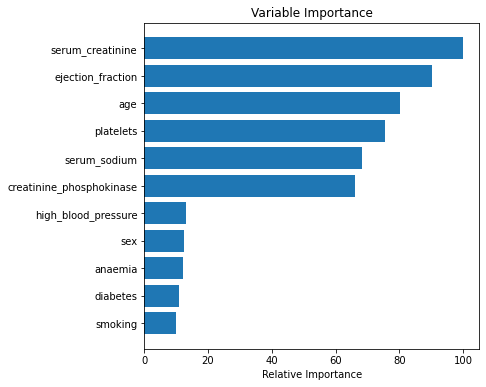

In [20]:
feat_importance(RFModel)

The model took into account every feature. It seems to be align with the entropy model in that it considers serum creatinine levels and ejection fraction rates to be the two most important features; age seems to be the next biggest factor that determines whether the patient survives from a heart failure or not, which intuitively makes sense. Whether the patient had diabetes, smokes, or had high blood pressure was once again not considered important.

## 6. Extreme Gradient Boosting Model Using Bayesian Hyperparameter Optimization

In [21]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [22]:
from skopt import BayesSearchCV
from xgboost import XGBClassifier
XGBModel=XGBClassifier()
opt = BayesSearchCV(XGBModel,{"n_estimators":[i for i in range(20,300)],
                              "max_depth":[i for i in range(2,30)],'reg_lambda':[1,2],
                              'gamma':[0,0.1,0.2,0.3]},n_iter=25,cv=3)
opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[18:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[18:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old b

C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[18:37:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[18:37:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\juang\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [23]:
print("best params:", str(opt.best_params_))

best params: OrderedDict([('gamma', 0.3), ('max_depth', 2), ('n_estimators', 36), ('reg_lambda', 1)])


In [24]:
XGBModel=XGBClassifier(gamma=0.3,reg_lambda=1,max_depth=2,n_estimators=28,random_state=10)
XGBModel.fit(X_train,y_train)
y_pred = XGBModel.predict(X_test)
y_pred = pd.Series(y_pred)
print('"Model: XGBoost"')
print("    Accuracy:", accuracy_score(y_test, y_pred))
print('    f1-score=', f1_score(y_test, y_pred, average='weighted'))
print("    Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('    Confusion Matrix:','\n',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[18:38:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
"Model: XGBoost"
    Accuracy: 0.7415730337078652
    f1-score= 0.7309598527546912
    Balanced accuracy: 0.674712643678161
    Confusion Matrix: 
 [[52  8]
 [15 14]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        60
           1       0.64      0.48      0.55        29

    accuracy                           0.74        89
   macro avg       0.71      0.67      0.68        89
weighted avg       0.73      0.74      0.73        89



This seems to be a slightly better model than our Random Forest model.

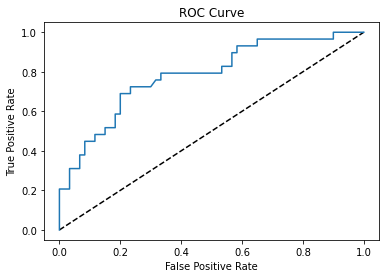

AUC Score: 0.7824712643678162


In [25]:
y_pred_prob = XGBModel.predict_proba(X_test)[:,1]

# Plot ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('AUC Score:',auc(false_positive_rate, true_positive_rate))


The AUC Score is a bit lower, but they are pretty much the same.

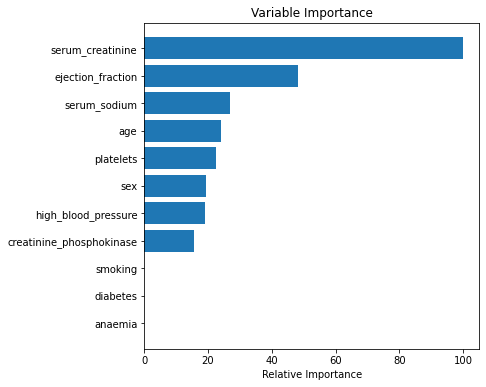

In [26]:
feat_importance(XGBModel)

Further analyses was done using Extreme Gradient Boosting using Bayesian Hyperparameter Optimization; but judging from its similarity the default Entropy model it seems that it will most likely be more useful to have more observations to train our  Random Forest model.